The **SpherePoints** primitive displays a cloud of points, which can optionally be automatically projected onto the surface of a sphere. It is mostly useful in conjunction with *additive rendering* to display density maps in 3D space.

In [1]:
import warnings
warnings.simplefilter('ignore')
import itertools
import numpy as np
import plato

# this controls whether static images are embedded in the notebook or not
if True:
    import vispy.app;vispy.app.use_app('pyglet')
    features = dict(static=True)    
else:
    features = {}
    
import plato.draw.vispy as draw

First, we generate a basic set of points that correspond to a simple cubic structure. The typical use case for `SpherePoints` is to display a summary of many hundreds or thousands of individually noisy observations.

In [2]:
trials = np.arange(-2, 3)

base_points = []
for (i, j, k) in itertools.product(trials, trials, trials):
    point = (i, j, k)
    if 0 < np.dot(point, point) <= 4:
        base_points.append(point)
base_points = np.array(base_points, dtype=np.float32)

noisy_points = np.tile(base_points, (1024, 1))
noisy_points += np.random.normal(scale=.05, size=noisy_points.shape)

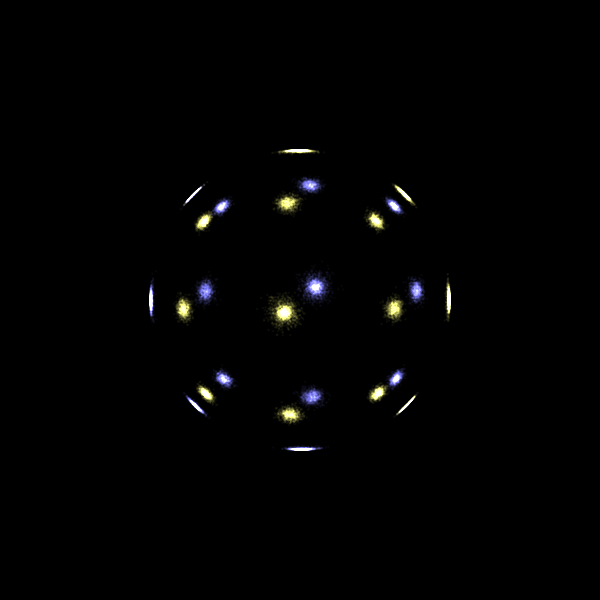

In [3]:
prim = draw.SpherePoints(points=noisy_points, on_surface=True)

rotation = [0.9977202415466309, 0.042361147701740265, -0.052402839064598083, 0.003720143809914589]
additive_features = dict(additive_rendering=True)
scene = draw.Scene(prim, features=dict(additive_features, **features),
                  size=(4, 4), pixel_scale=150, rotation=rotation)
scene.show()

Alternatively, black-on-white images can be created, or the points can be displayed in their actual positions rather than projecting onto a sphere. The size and color contribution of each point can also be controlled through the *blur* and *intensity* attributes.

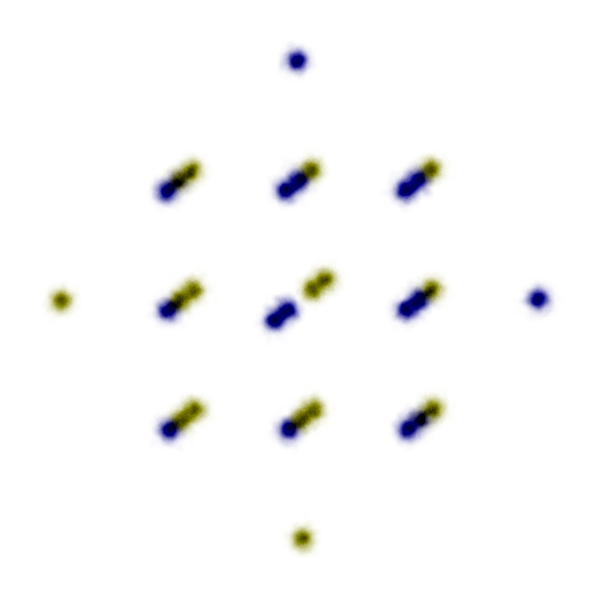

In [4]:
prim = draw.SpherePoints(
    points=noisy_points, on_surface=False, blur=10, intensity=2000)

additive_features = dict(additive_rendering=dict(invert=True))
scene = draw.Scene(prim, features=dict(additive_features, **features),
                  size=(4, 4), pixel_scale=150, rotation=rotation, zoom=.8)
scene.show()